**Acaba bölgede bulunan bakkal sayısı ev fiyatlarını etkiliyor mu?**

" https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download " linkinden aldığım veri seti üzerinden bu soruyu yanıtlayalım. Bunun için gerekli olan paketleri yüklemekle başlıyoruz.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Real estate.csv")

Veri setimize ucundan bir göz atalım.

In [17]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Tanımlayıcı istatistikler sayesinde verimiz hakkında kısa bir fikir edinmek istedim.

In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Kullanacağımız parametreleri seçip onları X ve y şeklinde değişkenlere atayalım.

In [13]:
data=df[["X4 number of convenience stores", "Y house price of unit area"]]

In [14]:
data.head()

,X4 number of convenience stores,Y house price of unit area
0,10,37.9
1,9,42.2
2,5,47.3
3,5,54.8
4,5,43.1


In [53]:
#input -> X (house age)
X= data["X4 number of convenience stores"]

#output -> y(house price)
y=data["Y house price of unit area"]

In [54]:
X

0      10
1       9
2       5
3       5
4       5
       ..
409     0
410     9
411     7
412     5
413     9
Name: X4 number of convenience stores, Length: 414, dtype: int64

X ve y değişkenlerimizi grafik üzerinde bir görelim ve aralarındaki bağlantıya bakalım.

Text(0, 0.5, 'Price')

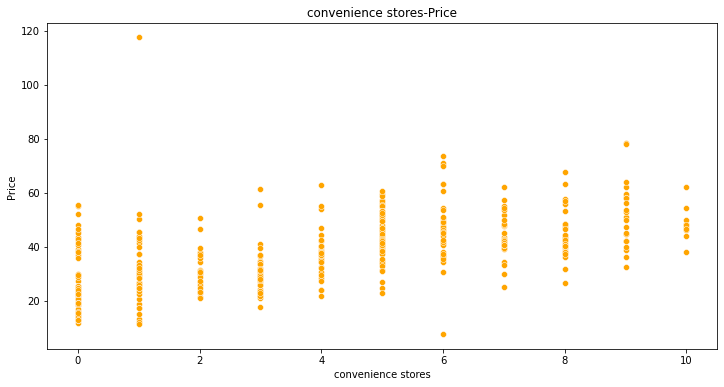

In [55]:
plt.subplots(figsize=(12,6))
sns.scatterplot(X, y,data=data, color="orange")

plt.title("convenience stores-Price")
plt.xlabel("convenience stores")
plt.ylabel("Price")

**Model oluşturmak**

Gerekli olan paketleri (sklearn.LinearRegression) yükleyelim ve modelimizi oluşturmaya başlayalım.

In [56]:
# sklearn LinearRegression

from sklearn.linear_model import LinearRegression

In [57]:
#lineer regresyon nesnesi yaratacağız
lr=LinearRegression()

Hazırlık için boyut kontrolü yapmamız gerekiyor

shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [58]:
X.shape

(414,)

In [21]:
y.shape

(414,)

Gördüğünüz gibi değişkenlerimizin şekli sklearn'ün LinearRegression classının istediği gibi değil.

Bunu düzeltmek için gerekli paketi (NumPy) yükleyip şeklini düzeltelim.

In [48]:
import numpy as np

In [22]:
X = X.values.reshape(-1, 1)

In [23]:
y= y.values.reshape(-1,1)

In [24]:
print("X'in yeni shape'i:" , X.shape)
print("y'nin yeni shape'i:", y.shape)

X'in yeni shape'i: (414, 1)
y'nin yeni shape'i: (414, 1)


**Train-Test Split**

Toplam 414 gözlemimizi Train-Test olarak ikiye ayıracağız.

Train: %70

Test: %30

Train Data: X_train, y_train

Test Data: X_test, y_test

In [26]:
# scikit-learn'den import

from sklearn.model_selection import train_test_split

In [27]:
# train data
# X_train, y_train

# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

In [28]:
# test ve train data şekilleri

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

X_train'in boyutu: (289, 1)
y_train'in boyutu: (289, 1)
X_test'in boyutu: (125, 1)
y_test'in boyutu: (125, 1)


In [29]:
# X_train'in tipi

type(X_train)

numpy.ndarray

####  Lineer Regresyon Modelini Çalıştır (Fit)

In [30]:
#regresyonu çalıştır -> fit
# fit -> öğrenme (train data üzerinden)

lr.fit(X_train, y_train)

LinearRegression()

#### Katsayıları Hesaplama (intercept_, coef_)

Bu kısımda b0 ve b1 katsayılarını öğreneceğiz.

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [31]:
# intercept -> beta0
print('intercept:', lr.intercept_)

intercept: [27.70943272]


In [32]:
#slope(coef_) -> beta 1
print("slope (coef) eğim:", lr.coef_)

slope (coef) eğim: [[2.53743281]]


#### Tahmin (Predict)

Modelin katsayılarını öğrendik ve şimdi test datası (X_test)üzerinden y değerlerini tahmin edebiliriz.

`y_pred`

Gerçek y'ler y_test olarak duruyor.

Onları tahminimizin doğruluğunu kontrol ederken kullanacağız. 

In [34]:
# tahmin yap

y_pred=lr.predict(X_test)

In [35]:
#tahminimizi yazdıralım 
y_pred

array([[40.39659678],
       [35.32173116],
       [50.54632803],
       [42.93402959],
       [42.93402959],
       [30.24686554],
       [45.47146241],
       [42.93402959],
       [42.93402959],
       [30.24686554],
       [37.85916397],
       [40.39659678],
       [30.24686554],
       [30.24686554],
       [45.47146241],
       [30.24686554],
       [50.54632803],
       [48.00889522],
       [32.78429835],
       [27.70943272],
       [27.70943272],
       [48.00889522],
       [30.24686554],
       [42.93402959],
       [35.32173116],
       [32.78429835],
       [27.70943272],
       [42.93402959],
       [37.85916397],
       [40.39659678],
       [53.08376084],
       [40.39659678],
       [48.00889522],
       [40.39659678],
       [30.24686554],
       [48.00889522],
       [35.32173116],
       [27.70943272],
       [45.47146241],
       [48.00889522],
       [42.93402959],
       [40.39659678],
       [37.85916397],
       [30.24686554],
       [37.85916397],
       [40

In [36]:
#tahmin datamızın şekli
y_pred.shape

(125, 1)

In [38]:
#test datamızın şekli
#y_test 
y_test.shape

(125, 1)

#### Gerçek Data ve Tahmin Datasını Çiz

Artık gerkçek verilerle çalışma zamanı.
Train datalarımız sayesinde verilermizi öğrendik.

Gerçek label -> y_test

tahmin label -> y_pred

Input -> X_test

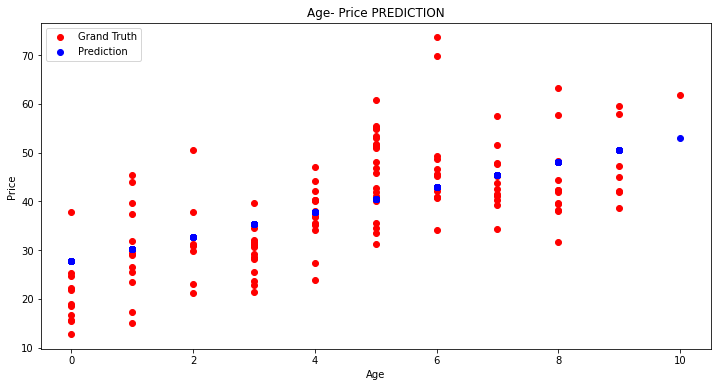

In [39]:
#Gerçek data -> Grand Truth
fig, ax= plt.subplots(figsize=(12,6))
ax.scatter(X_test, y_test, label= "Grand Truth", c="red")

#tahmin data -> Prediction
ax.scatter(X_test,y_pred, label="Prediction", c="blue")

plt.title('Age- Price PREDICTION')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [59]:
# ilk 10 gerçek y değerini görelim

y_test[0:10]

array([[48. ],
       [31.3],
       [59.5],
       [34.1],
       [48.6],
       [26.6],
       [39.3],
       [45.1],
       [69.7],
       [23.5]])

In [60]:
# ilk 10 tahmin değerini görelim

y_pred[0:10]

array([[40.39659678],
       [35.32173116],
       [50.54632803],
       [42.93402959],
       [42.93402959],
       [30.24686554],
       [45.47146241],
       [42.93402959],
       [42.93402959],
       [30.24686554]])

#### Hataları Çizmek ($y - \hat y$)

Hata : Residual -> ($y - \hat y$)

**y_test - y_pred**

In [42]:
import numpy as np

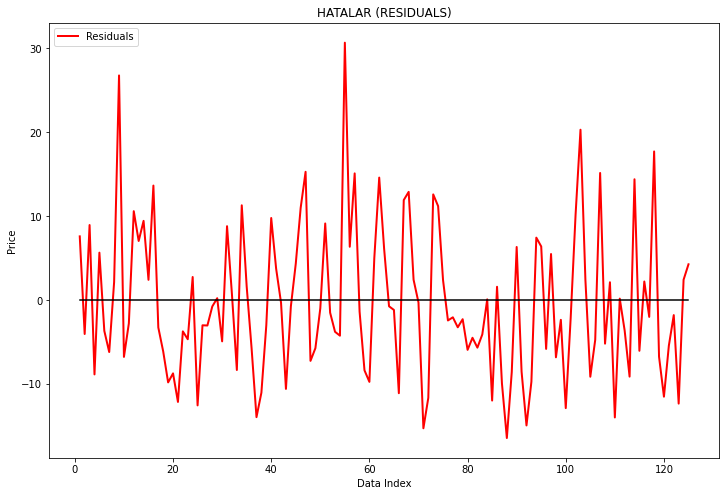

In [61]:
# Her bir tahmin noktasındaki hatayı görelim
indexler = range(1,126)

# Residuls -> Hatalar
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# sıfır doğrusunu çiz
ax.plot(indexler, np.zeros(125), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

#### Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error (MSE'nin karekökü aslında)


$R^2$: `coefficient of determination`.

In [44]:
# sklearn import etmek
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
r2= r2_score(y_test,y_pred)

In [46]:
r2*100

43.03820258539348

In [47]:
print('R^2:', r2*100)

R^2: 43.03820258539348


In [48]:
mse= mean_squared_error(y_test, y_pred)

In [49]:
#rmse hesaplama
import math
rmse= math.sqrt(mse)

In [50]:
rmse

8.935225491590023

#### Yorumlar

**$R^2$ = %43,04** çıktı.

Bu şu demek:

Bizim modelimiz gerçek datayı %43,04 oranında temsil ediyor.

**RMSE = 8.94** çıktı.

Yani, modelimiz tahmin ederken ortalamada 8.94'lük bir hata yapıyor.

Örneğin, gerçek değer = 59,5 iken tahmin = 50,54 çıktı.